# **CVPS20 // Filtering Data in 1- and 2-Dimensions**

*September 24, 2020*

This notebook further explores the concepts of convolution and cross-correlation of data in multiple dimensions.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio
from scipy.ndimage.filters import uniform_filter as uf
from scipy.ndimage.filters import gaussian_filter as gf
from scipy.ndimage.filters import median_filter as mf
from skimage.filters import threshold_otsu

In [2]:
# -- set rcParams for MPL so we don't have to type 'interpolation="nearest"'
plt.rcParams["image.cmap"] = "gist_gray"
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["figure.figsize"] = (8, 5)

In [7]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


---

### Filtering 2D Images

Arrays in 2D can befiltered exactly like arrays in 1D,

In [8]:
# -- read in a two dimensional image
fname = "/content/drive/My Drive/cvps20/data/examples/piv_video_cap.jpg"
img = np.asarray(iio.imread(fname)) / 255.

In [14]:
img_gray = np.asarray(iio.imread(fname, as_gray = True)) / 255.

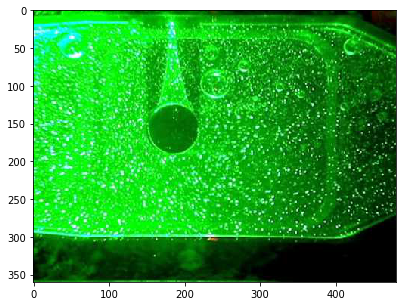

In [9]:
# -- show the image
plt.imshow(img)

In [11]:
# -- create a "luminosity" image
imgL = np.mean(img, axis=2)

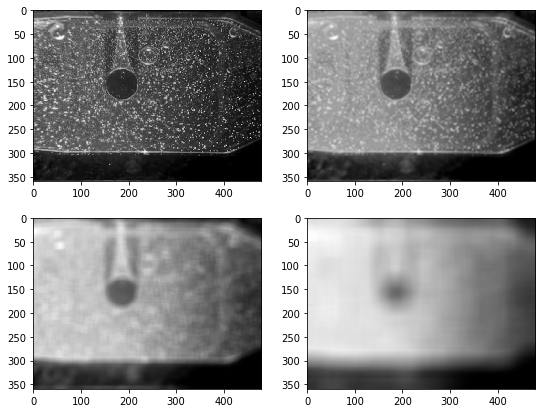

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(9, 7))

ax[0, 0].imshow(imgL)
ax[0, 1].imshow(uf(img_gray, 5))
ax[1, 0].imshow(uf(img_gray, 15))
ax[1, 1].imshow(uf(img_gray, 45))
fig.show()
#non equal weighting of r, g, b using the as_gray = True

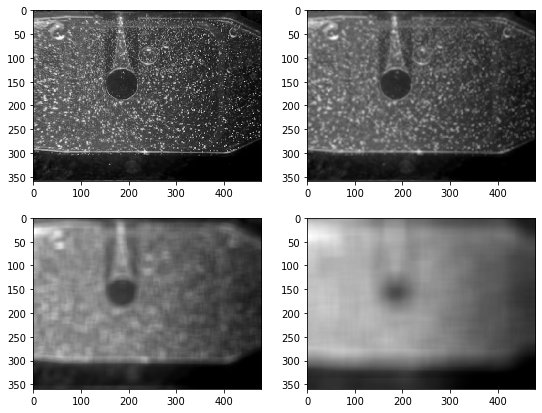

In [12]:
# -- show the image and a uniform filtered version
fig, ax = plt.subplots(2, 2, figsize=(9, 7))

ax[0, 0].imshow(imgL)
ax[0, 1].imshow(uf(imgL, 5))
ax[1, 0].imshow(uf(imgL, 15))
ax[1, 1].imshow(uf(imgL, 45))
fig.show()

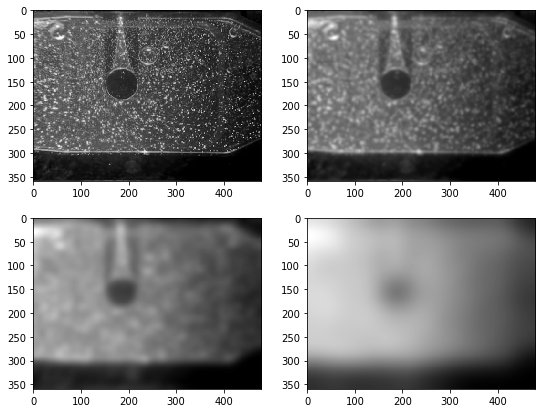

In [16]:
# -- let's compare a uniform and gaussian filter
fig, ax = plt.subplots(2, 2, figsize=(9, 7))

ax[0, 0].imshow(imgL)
ax[0, 1].imshow(gf(imgL, 5 / 2))
ax[1, 0].imshow(gf(imgL, 15 / 2))
ax[1, 1].imshow(gf(imgL, 45 / 2))
fig.show()

Notice, we can smooth the image with a different width in each dimension,

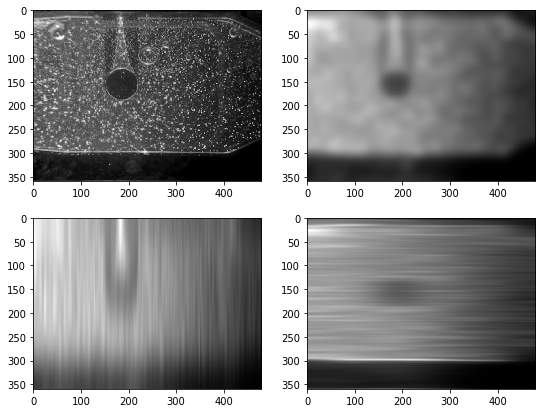

In [19]:
# -- show the image and a uniform filtered version
fig, ax = plt.subplots(2, 2, figsize=(9, 7))

ax[0, 0].imshow(imgL)
ax[0, 1].imshow(gf(imgL, 10))
ax[1, 0].imshow(gf(imgL, (40, 1)))
ax[1, 1].imshow(gf(imgL, (1, 40)))
fig.show()

Let's smooth the 3-color image with a Gaussian filter of width 20.


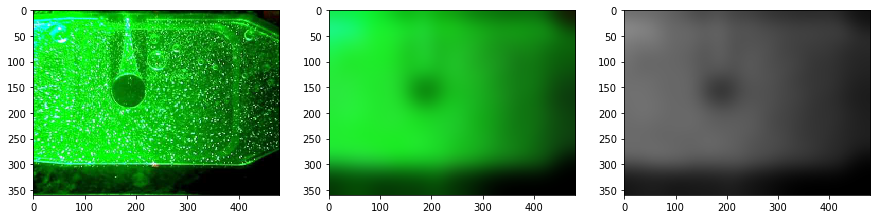

In [20]:
# -- "properly" and "improperly" smooth a 3-color image
fig, ax = plt.subplots(1, 3, figsize=(15, 8))
ax[0].imshow(img)
ax[1].imshow(gf(img, (20, 20, 0)))
ax[2].imshow(gf(img, 20))
fig.show()

---

### Adaptive Thresholding

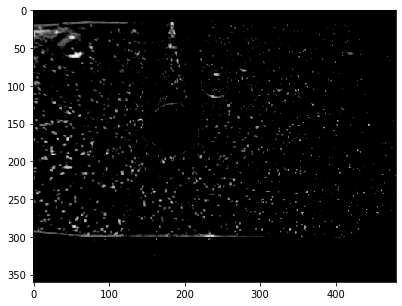

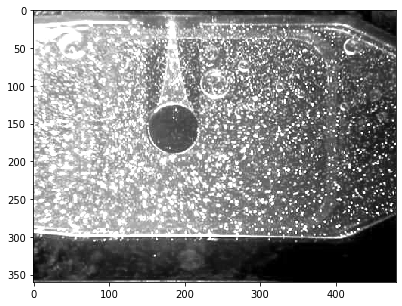

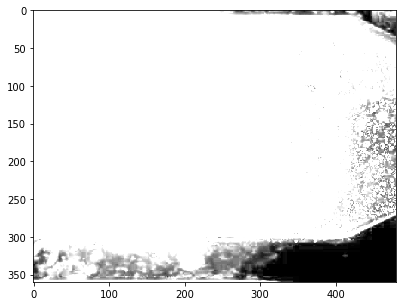

In [28]:
#how imshow works: Finds min value, max value. Says all pixels at min value are black, at max are white
#you can set the color limits to overwrite this
plt.imshow(imgL, clim = (0.5, 1.0))
plt.show()
#now everything less than min, more than max is white
plt.imshow(imgL, clim = (0, 0.5))
plt.show()

plt.imshow(imgL, clim = (0, 0.1))
plt.show()

Notice the difficulty Otsu's method (or really any global threshold) has with this image.

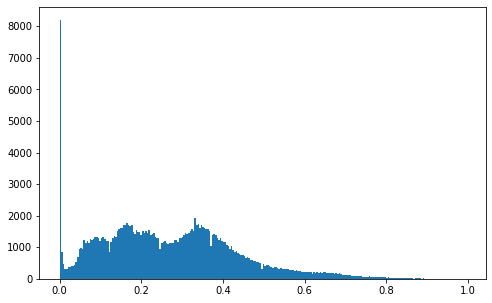

In [23]:
# -- generate a histogram of values of the luminosity image
plt.hist(imgL.flatten(), bins = 256);

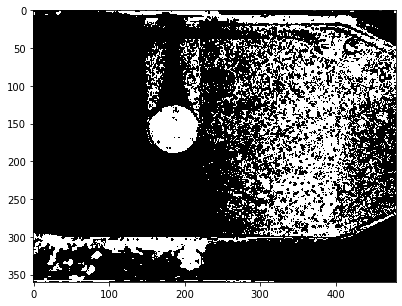

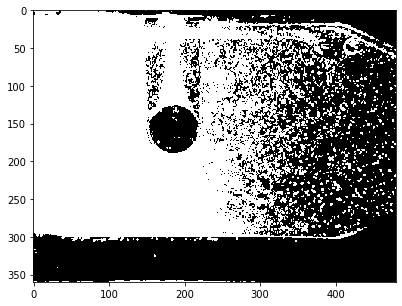

In [32]:
# -- threshold using Otsu's method
plt.imshow((imgL > .12) & (imgL < .23))
plt.show()
plt.imshow((imgL > .23))
plt.show()

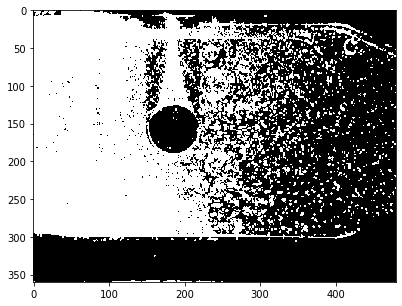

In [33]:
otsu_thr = threshold_otsu(imgL)

plt.imshow(imgL > otsu_thr)

Instead of applying a global threshold, let's threshold each pixel based on it surrounding neighbors,

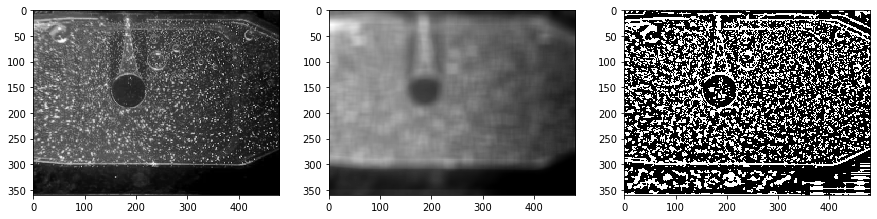

In [35]:
# -- threshold each pixel based on whether it is larger than the mean of the 
# -- surrounding 21x21 pixels
imgL_uf = uf(imgL, 21)

fig, ax = plt.subplots(1, 3, figsize = (15,10))
ax[0].imshow(imgL)
ax[1].imshow(imgL_uf)
ax[2].imshow(imgL > imgL_uf)
fig.show()

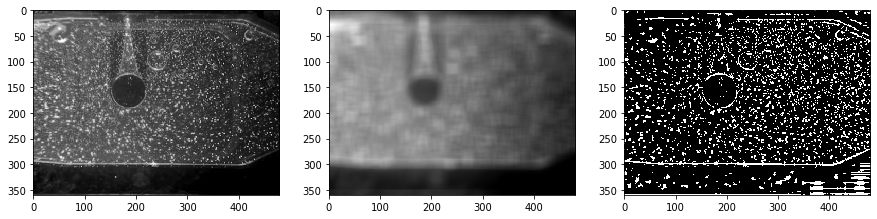

In [36]:
imgL_uf = uf(imgL, 21)

fig, ax = plt.subplots(1, 3, figsize = (15,10))
ax[0].imshow(imgL)
ax[1].imshow(imgL_uf)
ax[2].imshow(imgL > 1.3 * imgL_uf)
fig.show()

This is referred to as a **local** or **adaptive** thresholding technique.  Other filter types can be used as well,

In [ ]:
# -- threshold each pixel based on whether it is larger Gaussian weighted sum 
# -- of the surrounding pixels


Note that we can rearrange the above equation into `imgL - 1.2 * imgL_gf > 0`.

This method can also be used for detrending and local thresholding in 1D.

---

### Aside on Median Filtering

Median filters work a bit differently than top-hat or Gaussian filters in that they do not perform arithmetic operations on the images, but rather replace the value of a pixel with the median of the values in a top-hat window surrounding that window.

In [ ]:
# -- generate a noisy step function
np.random.seed(3597)
xx = np.linspace(-100., 100., 50)
yy = 1.0 * (xx > 20.) + 0.2 * np.random.randn(xx.size)

In 1D,

In [ ]:
# -- plot uniform, Gaussian, and median filters of the same width


And in 2D,

In [ ]:
# -- plot the median filtered version of the original image
fig, ax = plt.subplots(2, 2, figsize=(9, 7))


Note that median filters ***tend to preserve edges*** in the image that are larger than the filter size.